In [25]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END 
from langgraph.graph.message import add_messages 
from IPython.display import Image, display
from dotenv import load_dotenv
import gradio as gr
from langgraph.graph import StateGraph 
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random

In [26]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [27]:
graph_builder = StateGraph(State)

In [28]:
llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot_node(old_state: State) ->State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages= [response])
    return new_state

graph_builder.add_node("chatbot", chatbot_node)

In [29]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

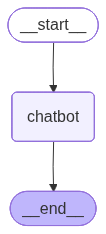

In [30]:
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
def chat(user_input: str, history):
    initial_stage =State(messages=[{"role":"user", "content":user_input}])
    result = graph.invoke(initial_stage)
    print(result)
    return result["messages"][-1].content

In [32]:
gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='37f343cd-1b6e-4051-a2a7-9ab0692e0242'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CNLxvN1bdOVvyhMvHSdaCZgK7VPHY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b64aa23a-fffc-401c-a2a0-31be74bd24f1-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
